In [1]:
import sys; sys.path.insert(0,'..')
from hashstash import *
logger.setLevel(logging.INFO)
from hashstash.profilers.engine_profiler import *
import plotnine as p9
import pandas as pd
p9.options.dpi = 300
p9.options.figure_size = (8, 7)

Profiling 14 stashes:   0%|          | 0/14 [00:00<?, ?it/s]

Profiling 14 stashes: 100%|██████████| 14/14 [00:00<00:00, 106.97it/s]


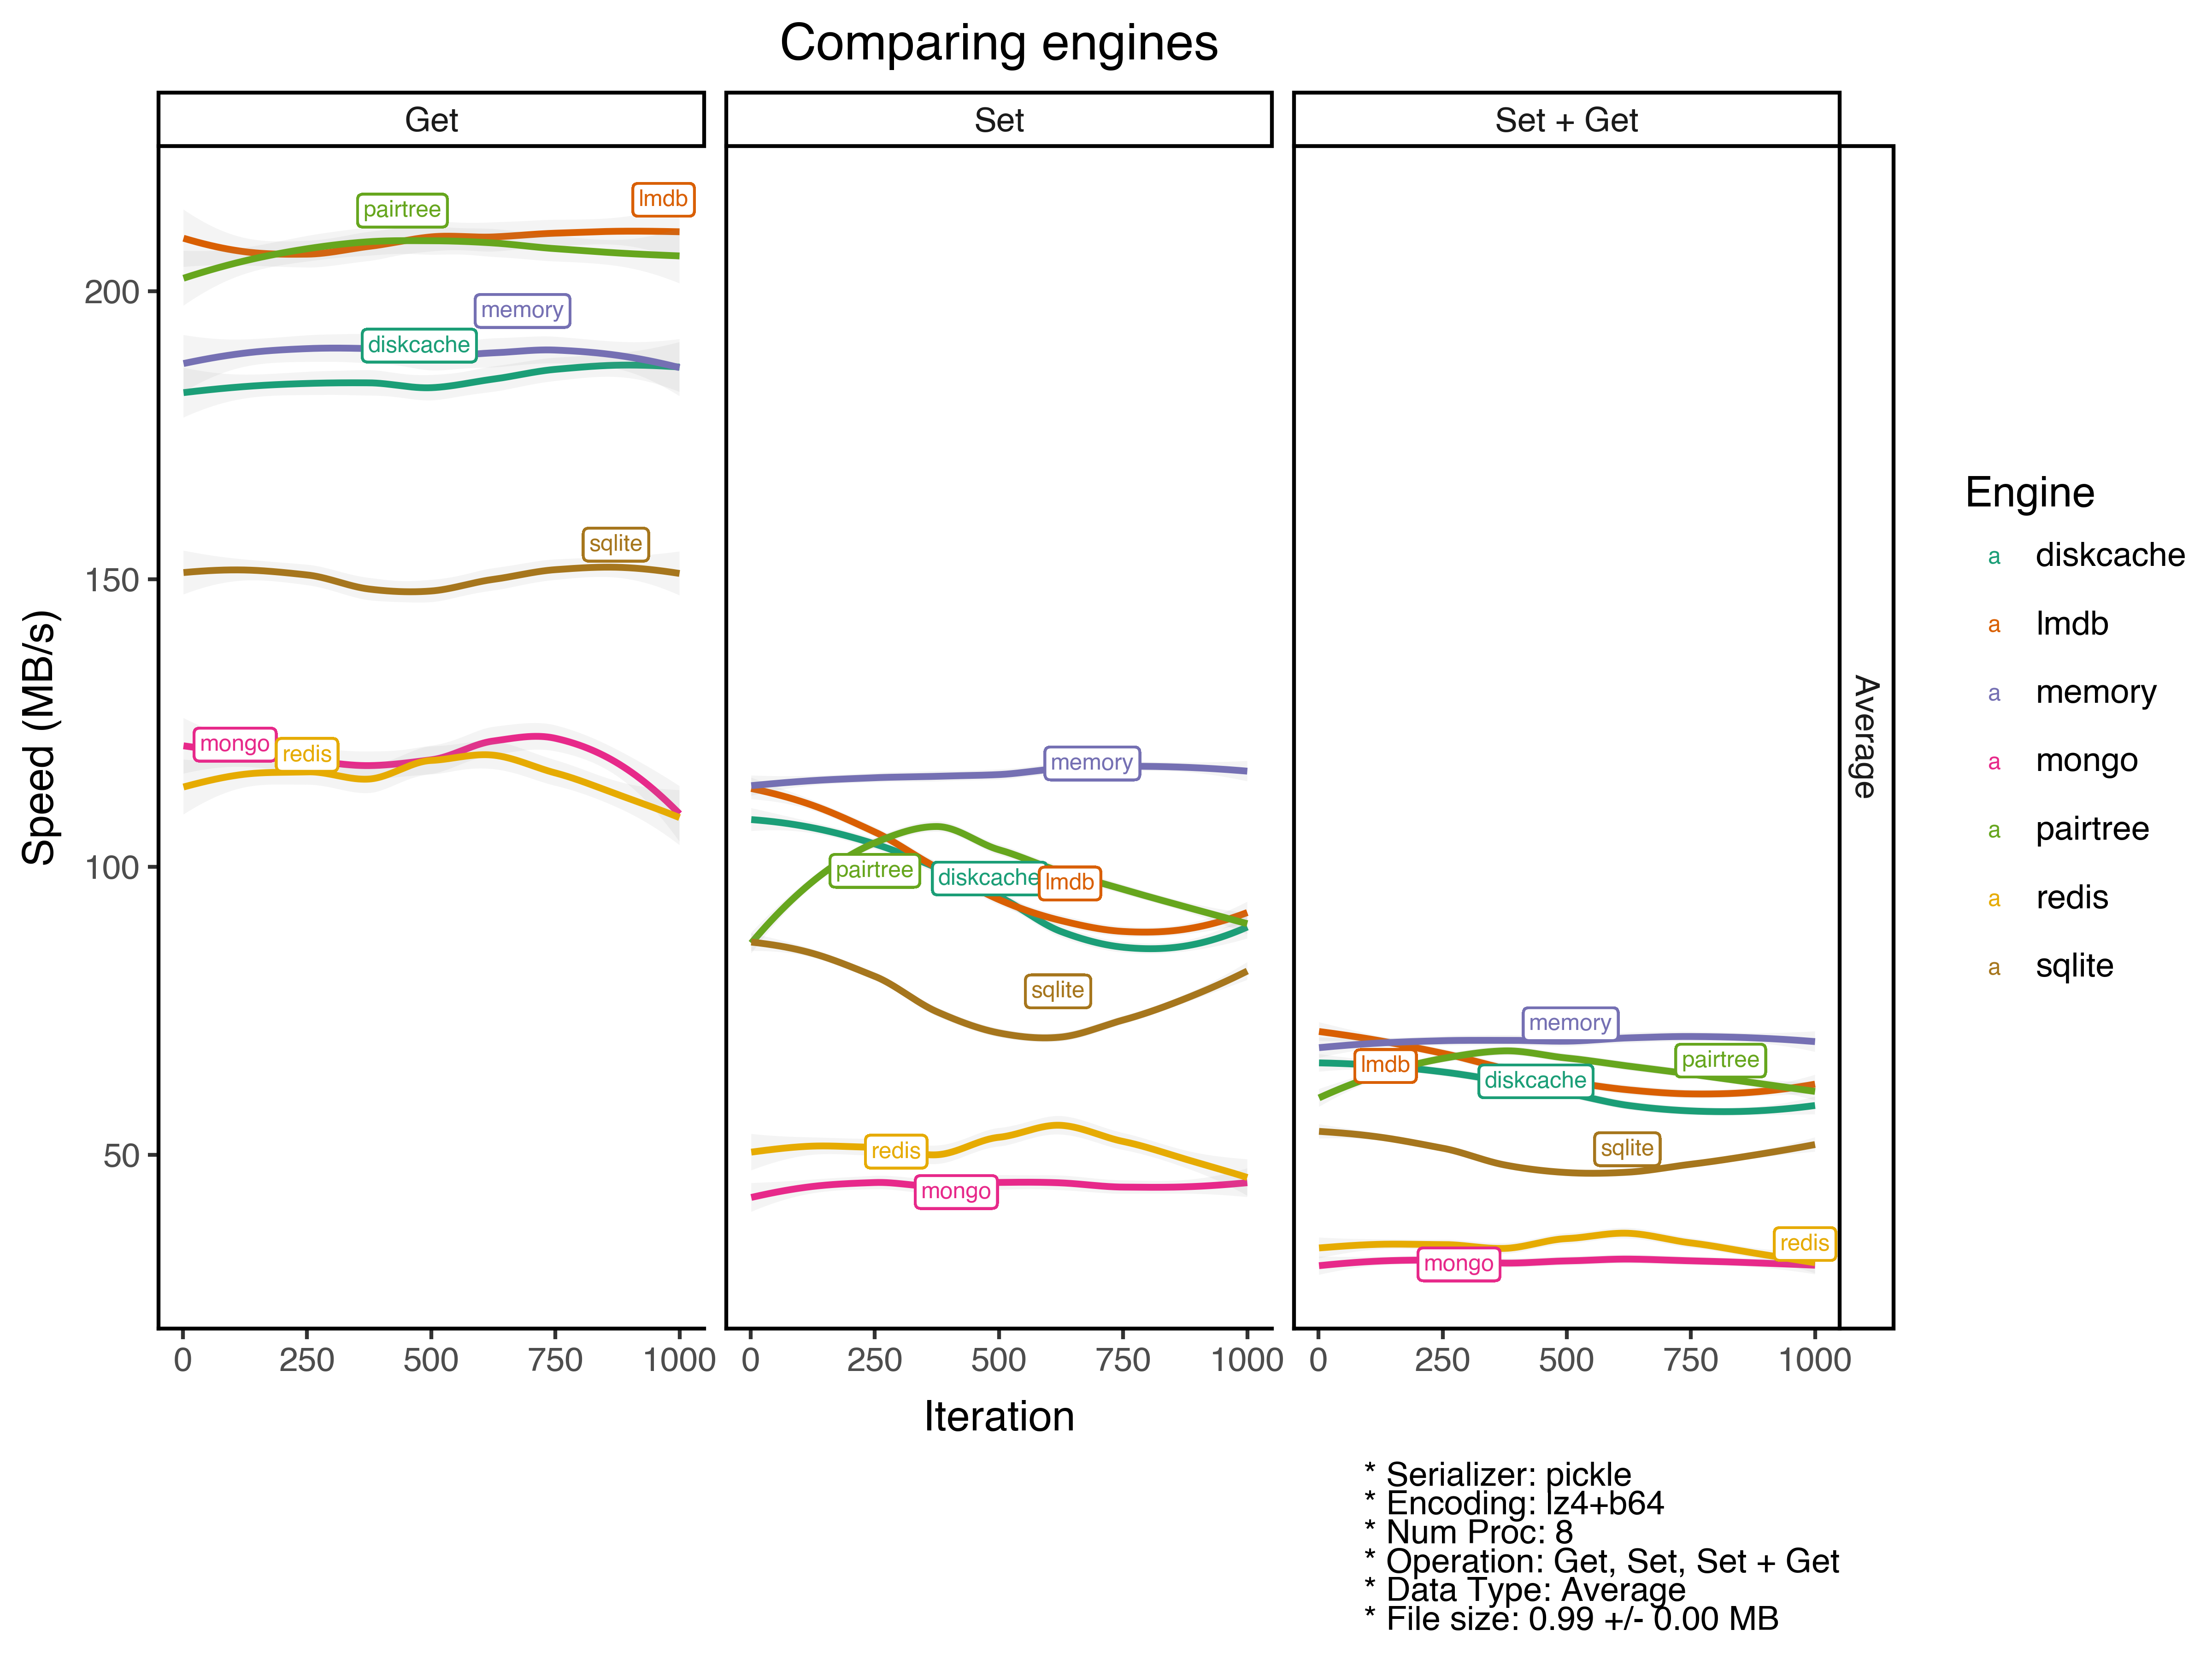

In [2]:
HashStashProfiler.plot_engines()

In [90]:
def plot_serializers(cls,filename=None,**opts):
    import plotnine as p9
    import pandas as pd
    p9.options.figure_size = (8, 6)
    df = cls.run_profiles(**opts_serializers).reset_index()
    figdf = df.groupby(['Serializer','Data Type']).median(numeric_only=True).reset_index().melt(
        id_vars=['Serializer','Data Type','Raw Size (B)', 'Serialized Size (B)'], 
        value_vars=['Serialize Time (s)', 'Deserialize Time (s)'], 
        value_name='Time (s)', 
        var_name='Operation'
    )
    figdf['Operation'] = figdf['Operation'].str.replace(' Time (s)', '')
    figdf['Operation'] = pd.Categorical(figdf['Operation'], categories=['Serialize', 'Deserialize'])
    figdf['Serialized Size (MB)'] = figdf['Serialized Size (B)'] / 1024 / 1024
    figdf['Rate (MB/s)'] = figdf['Raw Size (B)'] / figdf['Time (s)'] / 1024 / 1024
    fig = p9.ggplot(figdf, p9.aes(x='Serialized Size (MB)', y='Rate (MB/s)', label='Serializer', color='Serializer'))
    fig+=p9.facet_grid('. ~ Operation')
    fig+=p9.geom_text(nudge_y=.05)
    fig+=p9.geom_point(p9.aes(shape='Data Type'))
    fig+=p9.theme_classic()
    fig+=p9.scale_y_log10()
    fig+=p9.scale_color_brewer(type='qual', palette=2)
    fig+=p9.labs(
        x=f'Serialized Size (MB)',
        y='Rate (MB/s)',
        color='Serializer',
        title='Comparing serializers'
    )
    rawsize = df['Raw Size (B)'].median()/1024/1024
    fig += p9.geom_vline(xintercept=rawsize, linetype='dashed', color='gray')
    fig += p9.annotate("text", x=rawsize, y=5, nudge_x=.001, label=f'Raw size = {rawsize:.1f} MB', color='gray', alpha=1, ha='left')
    if filename is None:
        filename = f"fig.comparing_serializers_size_speed.png"
    figfn = Path(profiler_stash.path).parent / "figures" / filename
    figfn.parent.mkdir(parents=True, exist_ok=True)
    fig.save(figfn)
    return fig


Profiling 6 stashes:   0%|          | 0/6 [00:00<?, ?it/s]


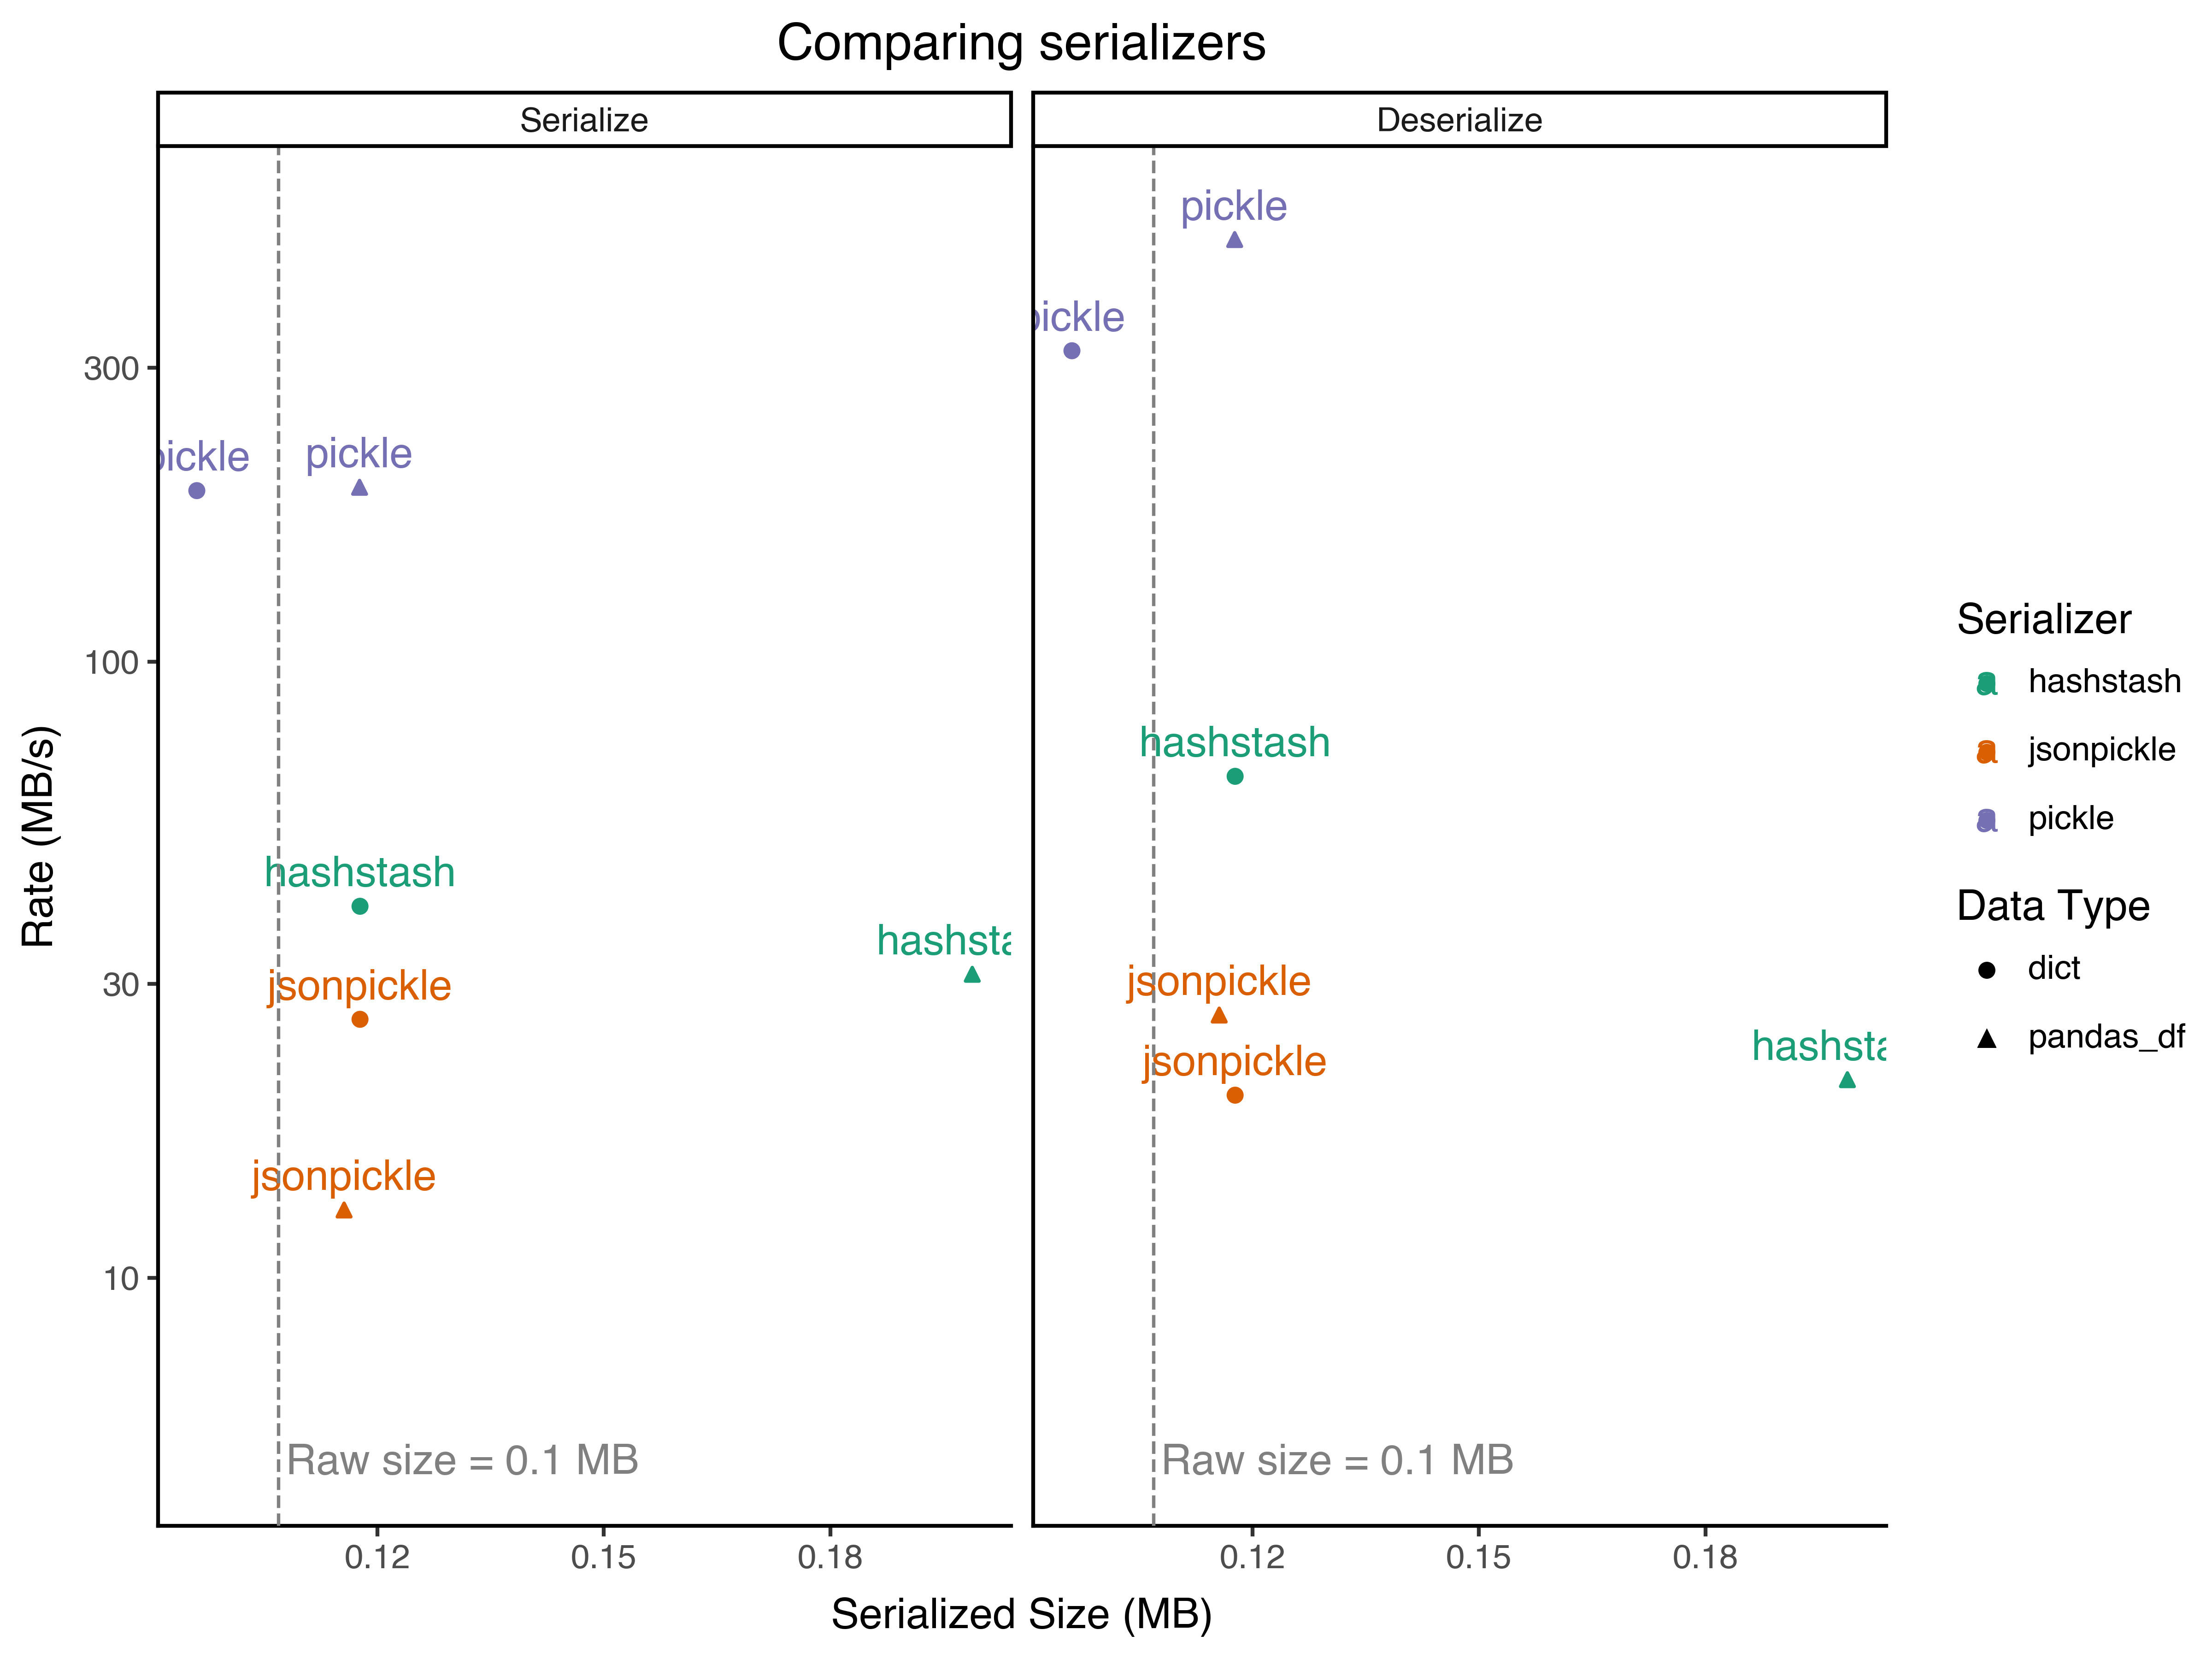

In [91]:
plot_serializers(HashStashProfiler)